In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("playstore-analysis.csv")

In [3]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
print(df1.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [5]:
df1.shape

(10841, 13)

# Data Cleanup - Missing Value Treatment

###### Q. Drop records where rating is missing since rating is our target/study variable

In [6]:
index=df1[df1['Rating'].isna()].index
df1.drop(labels=index,inplace=True)

###### Q. Check the null values for the android version column

In [7]:
df1[df1['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


###### Q. Drop the 3rd record ie record for "Life Made WiFi Touchscreen PhotoFrame"

In [8]:
df1=df1.drop([10472], axis=0)

###### Verifying dropped record 

In [9]:
df1[df1['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


###### Q. Replace remaining missing values with the most common value

In [10]:
df1['Current Ver'].fillna(df1['Current Ver'].mode()[0], inplace=True)

# Data Cleanup- Correcting the data types

###### Q. Which all variables need to be brought to numeric types?

In [11]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

###### Values to be change to numeric are reviews, price and installs

###### Q. Remove the dollar sign

In [12]:
price = []
for i in df1['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)

###### Q. Convert to float 

In [13]:
df1['Price'] = price
df1['Price'] = df1['Price'].astype('float')

###### Q. Remove ',' and '+' sign

In [14]:
install = []
for col in df1['Installs']:
    install.append(col.replace(',','').replace('+','').strip())
df1['Installs'] = install
df1['Installs'] = df1['Installs'].astype('int')

######  Q. Convert the identified columns (reviews) integer

In [15]:
df1['Reviews'] = df1['Reviews'].astype('int')

###### Verifying all  numeric values


In [16]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Sanity Check

In [17]:
df1['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [18]:
print(df1['Rating'].max())
print(df1['Rating'].min())

5.0
1.0


###### Q. Checking if any any values exist below minimum value or maximum value

In [19]:
print((df1['Rating']>df1['Rating'].max() ).sum())
print((df1['Rating']<df1['Rating'].min() ).sum())

0
0


###### Q. Checking If Reviews are more than installs for applications

In [20]:
df1[df1['Reviews']>df1['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


###### Dropping the records where reviews > installs

In [169]:
index = df1[df1['Reviews']>df1['Installs']].index
df1.drop(labels = index, inplace = True)

In [170]:
df1[df1['Reviews']>df1['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [171]:
import warnings
warnings.filterwarnings('ignore')

###### Q. Identifying Outliner

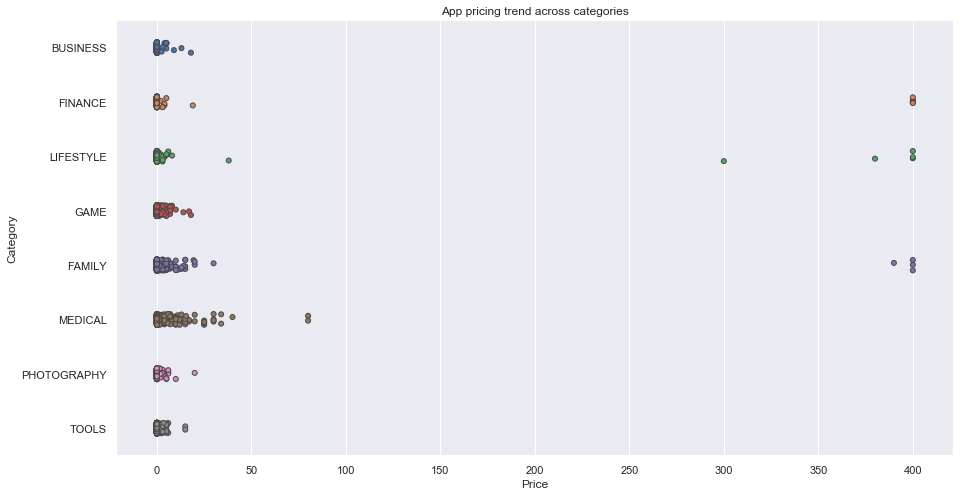

In [172]:
subset_df = df1[df1.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')


###### Q. As we see above, some of the outliers exist after 200 dollars, let's check the records

In [173]:
df1[df1['Price']>250]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


###### Q. Remove outliers and plot again

In [174]:
df1[['Category', 'App']][df1.Price > 30]

,Category,App
2253,MEDICAL,Vargo Anesthesia Mega App
2301,MEDICAL,A Manual of Acupuncture
2365,MEDICAL,Vargo Anesthesia Mega App
2402,MEDICAL,A Manual of Acupuncture
2414,MEDICAL,LTC AS Legal
4197,FAMILY,most expensive app (H)
4362,LIFESTYLE,💎 I'm rich
4367,LIFESTYLE,I'm Rich - Trump Edition
5351,LIFESTYLE,I am rich
5354,FAMILY,I am Rich Plus


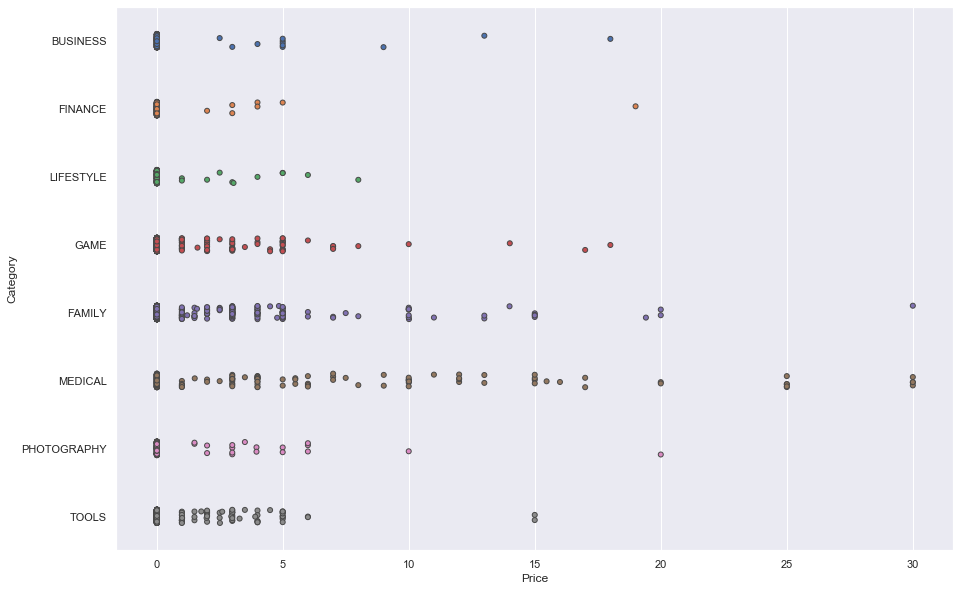

In [175]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
subset_df_price = subset_df[subset_df.Price<30]
p = sns.stripplot(x="Price", y="Category", data=subset_df_price, jitter=True, linewidth=1)


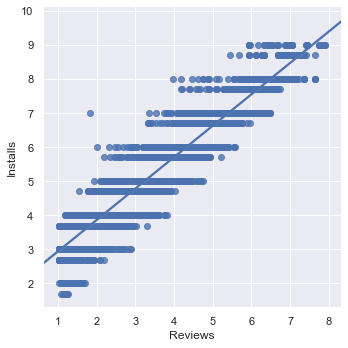

In [176]:
df_copy = df1.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df1['Installs'])
df_copy['Reviews'] = np.log10(df1['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()


###### This means that customers tend to download a given app more if it has been reviewed by a larger number of people. This also means that many active users who download an app usually also leave back a review or feedback. So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

######  Q. Limit data to apps with < 1 Million reviews

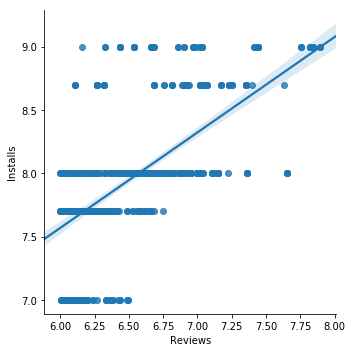

In [22]:
df_copy = df1.copy()

df_copy = df_copy[df_copy.Reviews > 1000000]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df1['Installs'])
df_copy['Reviews'] = np.log10(df1['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()


In [23]:
print("{} percentile of install is {}".format(95,np.percentile(df1['Installs'],95)))

95 percentile of install is 100000000.0


# Data analysis to answer business questions

###### What is the distribution of ratings like?

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


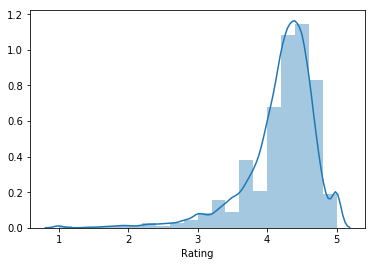

In [24]:

sns.distplot(df1['Rating'],bins = 20)
plt.show()

As we see above, majority of applications range between 4-5 rating, so it is skewed to higher values

###### Q. What are the top Content Rating values?

In [180]:
df1['Content Rating'].describe()

count         9359
unique           6
top       Everyone
freq          7414
Name: Content Rating, dtype: object

###### Q. Are there any values with very few records?

In [181]:
df1['Content Rating'].value_counts() 

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

##### Q. If yes, drop those as they won’t help in the analysis

In [182]:
index = df1[(df1['Content Rating']=='Adults only 18+') | (df1['Content Rating']=='Unrated')].index
df1.drop(labels = index, inplace = True)

In [183]:
df1['Content Rating'].value_counts() 

Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

##### Q. Make a joinplot to understand the effect of size on rating

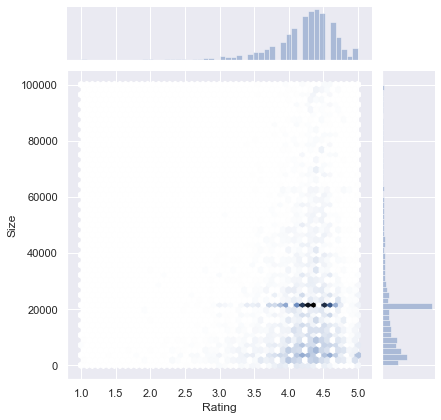

In [184]:
sns.jointplot(x = 'Rating', y= 'Size', data = df1, kind='hex')
plt.show()

Apps with 20mb or below that have better chance of getting higher rating

##### Q. Make a joinplot to understand the effect of size on rating

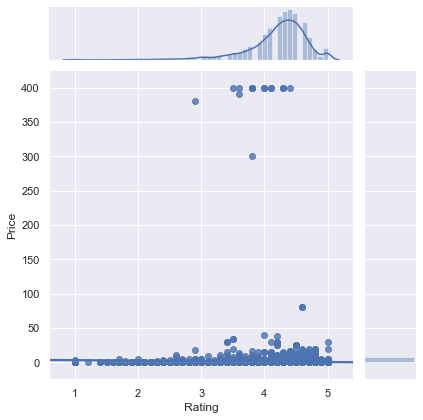

In [185]:
sns.jointplot(x = 'Rating', y= 'Price', data = df1, kind='reg')
plt.show()

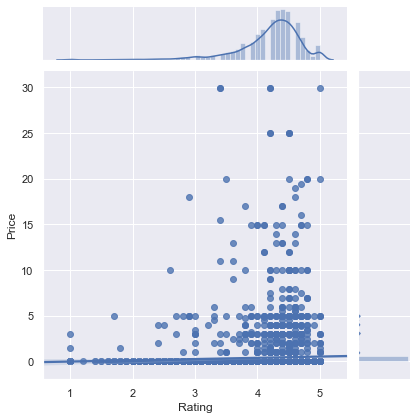

In [214]:
subset_df_price = subset_df[subset_df.Price<30]
p = sns.jointplot(x="Rating", y="Price", data=subset_df_price, kind='reg')


As we have seen before, majority of apps come under price of 30 dollars, but even after applying the filter, there is no proper display of pattern for analysis

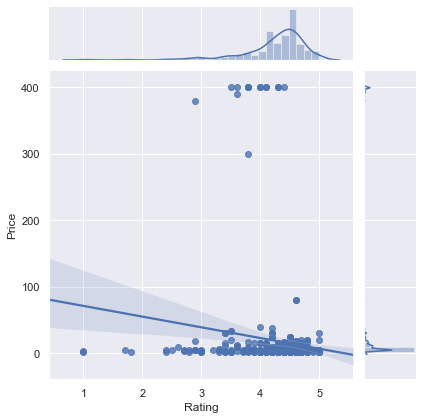

In [204]:
subset_df_price = subset_df[subset_df.Price>0]
p = sns.jointplot(x="Rating", y="Price", data=subset_df_price, kind='reg')


We can say that there is a decline in slope in the line of regression, which means the variations are less when it comes to higher ratings and lower price

##### Q. Make a pairplort with the colulmns -Reviews, Size, Rating,Price

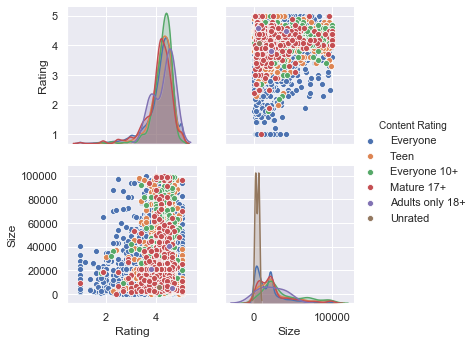

In [197]:
sns.pairplot(df1, hue = 'Content Rating')

##### Q. Rating vs. content rating

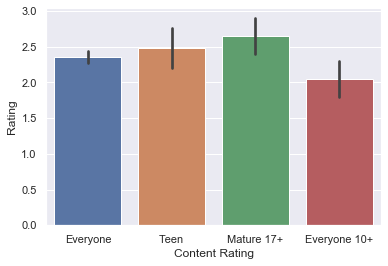

In [210]:
subset_df_rating = subset_df[df1.Rating<3]
ax = sns.barplot(x="Content Rating", y="Rating", data=subset_df_rating)

##### Q. Content rating vs. size vs. rating

In [ ]:
Q11 was quite complex for my understanding. I tried to take help of youtube/ google but still couldnt figure it out